This notebook contains an illustration of what happens when the empirical risk alone is minimized.
$$R_{emp}=\frac{1}{l}\sum_{i=1}^l c(x_i,y_i,f(x_i))$$

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sv_machines.datasets.function_a import (
    function_a,
    get_function_a_dataset,
    get_function_a_plot,
)

**Define parameters**

In [ ]:
N_SAMPLES = 20
HIGH_DEGREE = 20  # High polynomial degree simulates high dimensionality/capacity
EPSILON_NOISE = 0.5
X_RANGE_DEMO = (1.0, 8.0)

**Generate data from "a" function**

In [ ]:
np.random.seed(42)  # for reproducibility
X_train_raw, y_train_raw = get_function_a_dataset(
    epsilon=EPSILON_NOISE,
    x_range=X_RANGE_DEMO,
    num_points=N_SAMPLES,
    epsilon_strict=False,
)

X_train = X_train_raw.reshape(-1, 1)
y_train = y_train_raw

**Define and train model**

In [ ]:
# LinearRegression has no regularization (lambda=0), achieving pure empirical risk minimization.
model_overfit = Pipeline(
    [
        # PolynomialFeatures creates the high-dimensional feature space (capacity)
        ("poly", PolynomialFeatures(degree=HIGH_DEGREE, include_bias=False)),
        # LinearRegression performs the minimization (empirical risk)
        ("linear", LinearRegression()),
    ]
)

model_overfit.fit(X_train, y_train)

# Define smooth X range for prediction plot and calculating true test values
X_test_plot = np.linspace(X_RANGE_DEMO[0], X_RANGE_DEMO[1], 100).reshape(-1, 1)
y_true_plot = function_a(X_test_plot)

# Predictions
y_train_predict = model_overfit.predict(X_train)
y_test_predict = model_overfit.predict(X_test_plot)

# Empirical Risk
empirical_risk = mean_squared_error(y_train, y_train_predict)
# Expected Risk Proxy
expected_risk_proxy = mean_squared_error(y_true_plot, y_test_predict)

**Plotting**

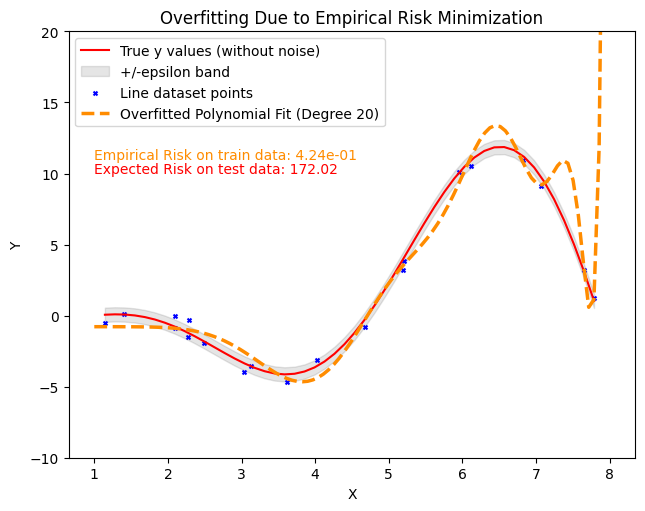

In [31]:
fig, ax = get_function_a_plot(
    x_dataset=X_train_raw,
    y_dataset=y_train_raw,
    epsilon=EPSILON_NOISE,
    with_true_function=True,
)

ax.plot(
    X_test_plot,
    y_test_predict,
    color="darkorange",
    linestyle="--",
    linewidth=2.5,
    label=f"Overfitted Polynomial Fit (Degree {HIGH_DEGREE})",
)

ax.set_title("Overfitting Due to Empirical Risk Minimization")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(bottom=-10, top=20)

text_y_start = ax.get_ylim()[1]
ax.text(
    X_RANGE_DEMO[0],
    text_y_start * 0.55,
    f"Empirical Risk on train data: {empirical_risk:.2e}",
    fontsize=10,
    color="darkorange",
)
ax.text(
    X_RANGE_DEMO[0],
    text_y_start * 0.5,
    f"Expected Risk on test data: {expected_risk_proxy:.2f}",
    fontsize=10,
    color="red",
)

ax.legend()
plt.show()